# CAPSTONE PROJECT: AMAZON REVIEW ANALYSIS

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

# Datasets were downloaded from:

# Datasets chosen in the following two categories:

1.Toys and Games

2.Baby

# Data Preparation:

1.Importing the json files.

2.Viewing the data

3.Converting to .csv and storing it

4.Data Cleaning by- finding null values, dropping columns that are not needed for analysis, converting the unix date format  to readable datetime.

5.Renaming columns for better understanding.

 **STEPS PERFORMED:**

1.Importing required libraries

2.Punctuation and stop words cleaning on review coloumn

3.Lemmatization

4.Creating sentiment coloumn

5.Word cloud

6.Converting final dataset to csv

7.Extracting product names

8.Model building for TSA(Time series analysis)


In [2]:
import numpy as np
import pandas as pd
import json
import csv

In [3]:
toys_reviews= pd.read_json('C:/NIIT/Final_Project/files/Toys_and_Games_5.json', lines=True)

In [4]:
toys_reviews

reviewerID        asin      reviewerName helpful  \
0       A1VXOAVRGKGEAK  0439893577             Angie  [0, 0]   
1        A8R62G708TSCM  0439893577           Candace  [1, 1]   
2       A21KH420DK0ICA  0439893577    capemaychristy  [1, 1]   
3        AR29QK6HPFYZ4  0439893577              dcrm  [0, 0]   
4        ACCH8EOML6FN5  0439893577              DoyZ  [1, 1]   
...                ...         ...               ...     ...   
167592  A18Q24BZK2CB5P  B00LBI9BKA  nicole todhunter  [0, 0]   
167593  A1I8ON1X0B2N2W  B00LBI9BKA                PF  [1, 1]   
167594  A3V24H5350ULKI  B00LBI9BKA       Sara Tafuri  [0, 0]   
167595  A1W2F1WI0QZ4AJ  B00LBI9BKA    Tabitha Nicole  [0, 0]   
167596   AV6WVMUJVUHNB  B00LBI9BKA          ToyLover  [0, 0]   

                                               reviewText  overall  \
0       I like the item pricing. My granddaughter want...        5   
1       Love the magnet easel... great for moving to d...        4   
2       Both sides are magnetic.  A real plus when you...        5   
3       Bought one a few years ago for my daughter and...        5   
4       I have a stainless steel refrigerator therefor...        4   
...                                                   ...      ...   
167592  This drone is very fun and super duarable. Its...        5   
167593  This is my brother's most prized toy. It's ext...        5   
167594  This Panther Drone toy is awesome. I definitel...        5   
167595  This is my first drone and it has proven to be...        5   
167596  This is a super fun toy to have around. In our...        4   

                                                  summary  unixReviewTime  \
0                                          Magnetic board      1390953600   
1       it works pretty good for moving to different a...      1395964800   
2                                              love this!      1359331200   
3                                       Daughters love it      1391817600   
4       Great to have so he can play with his alphabet...      1399248000   
...                                                   ...             ...   
167592                                           Very fun      1404691200   
167593                          Coolest toy on the market      1404691200   
167594                             A great idea for kids!      1404777600   
167595                                    Excellent Drone      1405641600   
167596                       Easy fun for the whole house      1405382400   

         reviewTime  
0       01 29, 2014  
1       03 28, 2014  
2       01 28, 2013  
3        02 8, 2014  
4        05 5, 2014  
...             ...  
167592   07 7, 2014  
167593   07 7, 2014  
167594   07 8, 2014  
167595  07 18, 2014  
167596  07 15, 2014  

[167597 rows x 9 columns]

In [5]:
toys_reviews.isnull().sum()

reviewerID          0
asin                0
reviewerName      838
helpful             0
reviewText          0
overall             0
summary             0
unixReviewTime      0
reviewTime          0
dtype: int64

In [6]:
toys_reviews.dropna(inplace=True)

In [7]:
toys_reviews.shape

(166759, 9)

In [8]:
toys_reviews['unixReviewTime'] = pd.to_datetime(toys_reviews['unixReviewTime'],unit='s')

In [9]:
toys_reviews.reviewTime=pd.to_datetime(toys_reviews.reviewTime)

In [10]:
toys_reviews1=toys_reviews.drop(['reviewerName'], axis = 1)

In [11]:
help1=pd.DataFrame(toys_reviews1['helpful'].tolist(),columns=['h1','h2'])

In [12]:
toys_reviews1["helpful_score"]=(help1["h1"]/help1["h2"])

In [13]:
toys_reviews1['helpful_score']=toys_reviews1['helpful_score'].fillna(0)

In [14]:
toys_reviews1.head()

reviewerID        asin helpful  \
0  A1VXOAVRGKGEAK  0439893577  [0, 0]   
1   A8R62G708TSCM  0439893577  [1, 1]   
2  A21KH420DK0ICA  0439893577  [1, 1]   
3   AR29QK6HPFYZ4  0439893577  [0, 0]   
4   ACCH8EOML6FN5  0439893577  [1, 1]   

                                          reviewText  overall  \
0  I like the item pricing. My granddaughter want...        5   
1  Love the magnet easel... great for moving to d...        4   
2  Both sides are magnetic.  A real plus when you...        5   
3  Bought one a few years ago for my daughter and...        5   
4  I have a stainless steel refrigerator therefor...        4   

                                             summary unixReviewTime  \
0                                     Magnetic board     2014-01-29   
1  it works pretty good for moving to different a...     2014-03-28   
2                                         love this!     2013-01-28   
3                                  Daughters love it     2014-02-08   
4  Great to have so he can play with his alphabet...     2014-05-05   

  reviewTime  helpful_score  
0 2014-01-29            0.0  
1 2014-03-28            1.0  
2 2013-01-28            1.0  
3 2014-02-08            0.0  
4 2014-05-05            1.0

In [15]:
toys_reviews2=toys_reviews1.iloc[:,[0,1,3,4,5,7,8]]

In [16]:
toys_reviews2

reviewerID        asin  \
0       A1VXOAVRGKGEAK  0439893577   
1        A8R62G708TSCM  0439893577   
2       A21KH420DK0ICA  0439893577   
3        AR29QK6HPFYZ4  0439893577   
4        ACCH8EOML6FN5  0439893577   
...                ...         ...   
167592  A18Q24BZK2CB5P  B00LBI9BKA   
167593  A1I8ON1X0B2N2W  B00LBI9BKA   
167594  A3V24H5350ULKI  B00LBI9BKA   
167595  A1W2F1WI0QZ4AJ  B00LBI9BKA   
167596   AV6WVMUJVUHNB  B00LBI9BKA   

                                               reviewText  overall  \
0       I like the item pricing. My granddaughter want...        5   
1       Love the magnet easel... great for moving to d...        4   
2       Both sides are magnetic.  A real plus when you...        5   
3       Bought one a few years ago for my daughter and...        5   
4       I have a stainless steel refrigerator therefor...        4   
...                                                   ...      ...   
167592  This drone is very fun and super duarable. Its...        5   
167593  This is my brother's most prized toy. It's ext...        5   
167594  This Panther Drone toy is awesome. I definitel...        5   
167595  This is my first drone and it has proven to be...        5   
167596  This is a super fun toy to have around. In our...        4   

                                                  summary reviewTime  \
0                                          Magnetic board 2014-01-29   
1       it works pretty good for moving to different a... 2014-03-28   
2                                              love this! 2013-01-28   
3                                       Daughters love it 2014-02-08   
4       Great to have so he can play with his alphabet... 2014-05-05   
...                                                   ...        ...   
167592                                           Very fun 2014-07-07   
167593                          Coolest toy on the market 2014-07-07   
167594                             A great idea for kids! 2014-07-08   
167595                                    Excellent Drone 2014-07-18   
167596                       Easy fun for the whole house 2014-07-15   

        helpful_score  
0                 0.0  
1                 1.0  
2                 1.0  
3                 0.0  
4                 1.0  
...               ...  
167592            0.0  
167593            0.0  
167594            0.0  
167595            0.0  
167596            0.0  

[166759 rows x 7 columns]

In [17]:
toys_reviews2.dtypes

reviewerID               object
asin                     object
reviewText               object
overall                   int64
summary                  object
reviewTime       datetime64[ns]
helpful_score           float64
dtype: object

In [18]:
toys_reviews2.isnull().sum()

reviewerID       0
asin             0
reviewText       0
overall          0
summary          0
reviewTime       0
helpful_score    0
dtype: int64

In [19]:
#toys_reviews2.to_csv("toys_and_games_review.csv")

# Importing libraries

In [1]:
#Basic libraries
import pandas as pd 
import numpy as np 


#NLTK libraries
import nltk
import re
import string
from wordcloud import WordCloud,STOPWORDS

# Machine Learning libraries
import sklearn 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import  StratifiedKFold, cross_val_score
from sklearn.metrics import f1_score, roc_auc_score,roc_curve
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import neighbors
from sklearn.feature_extraction.text import TfidfVectorizer  
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
#Visualization libraries
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Other miscellaneous libraries

from collections import defaultdict
from collections import Counter


In [21]:
toys_reviews2 = pd.read_csv('toys_and_games_review.csv')
toys_reviews2

Unnamed: 0      reviewerID        asin  \
0                0  A1VXOAVRGKGEAK  0439893577   
1                1   A8R62G708TSCM  0439893577   
2                2  A21KH420DK0ICA  0439893577   
3                3   AR29QK6HPFYZ4  0439893577   
4                4   ACCH8EOML6FN5  0439893577   
...            ...             ...         ...   
166754      167592  A18Q24BZK2CB5P  B00LBI9BKA   
166755      167593  A1I8ON1X0B2N2W  B00LBI9BKA   
166756      167594  A3V24H5350ULKI  B00LBI9BKA   
166757      167595  A1W2F1WI0QZ4AJ  B00LBI9BKA   
166758      167596   AV6WVMUJVUHNB  B00LBI9BKA   

                                               reviewText  overall  \
0       I like the item pricing. My granddaughter want...        5   
1       Love the magnet easel... great for moving to d...        4   
2       Both sides are magnetic.  A real plus when you...        5   
3       Bought one a few years ago for my daughter and...        5   
4       I have a stainless steel refrigerator therefor...        4   
...                                                   ...      ...   
166754  This drone is very fun and super duarable. Its...        5   
166755  This is my brother's most prized toy. It's ext...        5   
166756  This Panther Drone toy is awesome. I definitel...        5   
166757  This is my first drone and it has proven to be...        5   
166758  This is a super fun toy to have around. In our...        4   

                                                  summary  reviewTime  \
0                                          Magnetic board  2014-01-29   
1       it works pretty good for moving to different a...  2014-03-28   
2                                              love this!  2013-01-28   
3                                       Daughters love it  2014-02-08   
4       Great to have so he can play with his alphabet...  2014-05-05   
...                                                   ...         ...   
166754                                           Very fun  2014-07-07   
166755                          Coolest toy on the market  2014-07-07   
166756                             A great idea for kids!  2014-07-08   
166757                                    Excellent Drone  2014-07-18   
166758                       Easy fun for the whole house  2014-07-15   

        helpful_score  
0                 0.0  
1                 1.0  
2                 1.0  
3                 0.0  
4                 1.0  
...               ...  
166754            0.0  
166755            0.0  
166756            0.0  
166757            0.0  
166758            0.0  

[166759 rows x 8 columns]

In [22]:
toys_reviews3=toys_reviews2.drop(['Unnamed: 0'], axis = 1)

In [23]:
toys_reviews3.isnull().sum()

reviewerID        0
asin              0
reviewText       93
overall           0
summary           0
reviewTime        0
helpful_score     0
dtype: int64

In [24]:
toys_reviews4=toys_reviews3.dropna()

In [25]:
toys_reviews4.isnull().sum()

reviewerID       0
asin             0
reviewText       0
overall          0
summary          0
reviewTime       0
helpful_score    0
dtype: int64

### **Concatenating review text and summary**

In [26]:
toys_reviews4['reviews']=toys_reviews4['reviewText']+toys_reviews4['summary']
toys_reviews4=toys_reviews4.drop(['reviewText', 'summary'], axis=1)
toys_reviews4.head()

reviewerID        asin  overall  reviewTime  helpful_score  \
0  A1VXOAVRGKGEAK  0439893577        5  2014-01-29            0.0   
1   A8R62G708TSCM  0439893577        4  2014-03-28            1.0   
2  A21KH420DK0ICA  0439893577        5  2013-01-28            1.0   
3   AR29QK6HPFYZ4  0439893577        5  2014-02-08            0.0   
4   ACCH8EOML6FN5  0439893577        4  2014-05-05            1.0   

                                             reviews  
0  I like the item pricing. My granddaughter want...  
1  Love the magnet easel... great for moving to d...  
2  Both sides are magnetic.  A real plus when you...  
3  Bought one a few years ago for my daughter and...  
4  I have a stainless steel refrigerator therefor...

### **Review Text-Punctuation Cleaning**

###    '''Make text lowercase, remove text in square brackets,remove punctuation, remove words containing numbers  and hyphens.'''

In [27]:
def clean_text(text):
    
    # Remove all non-letters and non-spaces except for hyphens and digits
    text = re.sub("[^0-9A-Za-z\- ]+", " ", text)
    # Remove all numbers except those attached to a word
    text = re.sub("(?<!\w)\d+", "", text)
    # Remove all hyphens except between two words
    text = re.sub("-(?!\w)|(?<!\w)-", "", text)
    # Remove multiple spaces and lowercase everything
    text = " ".join(text.split())
    text = text.lower()

    return text

In [28]:
toys_reviews4['reviews']=toys_reviews4['reviews'].apply(clean_text)
toys_reviews4.head()

reviewerID        asin  overall  reviewTime  helpful_score  \
0  A1VXOAVRGKGEAK  0439893577        5  2014-01-29            0.0   
1   A8R62G708TSCM  0439893577        4  2014-03-28            1.0   
2  A21KH420DK0ICA  0439893577        5  2013-01-28            1.0   
3   AR29QK6HPFYZ4  0439893577        5  2014-02-08            0.0   
4   ACCH8EOML6FN5  0439893577        4  2014-05-05            1.0   

                                             reviews  
0  i like the item pricing my granddaughter wante...  
1  love the magnet easel great for moving to diff...  
2  both sides are magnetic a real plus when you r...  
3  bought one a few years ago for my daughter and...  
4  i have a stainless steel refrigerator therefor...

### Tokenization

In [29]:
toys_reviews4['reviews']=toys_reviews4.apply(lambda row: nltk.word_tokenize(row['reviews']), axis=1)

In [30]:
toys_reviews4.head(2)

reviewerID        asin  overall  reviewTime  helpful_score  \
0  A1VXOAVRGKGEAK  0439893577        5  2014-01-29            0.0   
1   A8R62G708TSCM  0439893577        4  2014-03-28            1.0   

                                             reviews  
0  [i, like, the, item, pricing, my, granddaughte...  
1  [love, the, magnet, easel, great, for, moving,...

### **Review Text-Stop words**

In [31]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
def stopwords_remover(text):
     
    # check in lowercase 
    t = [token for token in text if token.lower() not in stopwords.words("english")]
    text = ' '.join(t)    
    return text

In [33]:
toys_reviews4['reviews'] = toys_reviews4['reviews'].apply(stopwords_remover)

toys_reviews4.head()

reviewerID        asin  overall  reviewTime  helpful_score  \
0  A1VXOAVRGKGEAK  0439893577        5  2014-01-29            0.0   
1   A8R62G708TSCM  0439893577        4  2014-03-28            1.0   
2  A21KH420DK0ICA  0439893577        5  2013-01-28            1.0   
3   AR29QK6HPFYZ4  0439893577        5  2014-02-08            0.0   
4   ACCH8EOML6FN5  0439893577        4  2014-05-05            1.0   

                                             reviews  
0  like item pricing granddaughter wanted mark wa...  
1  love magnet easel great moving different areas...  
2  sides magnetic real plus entertaining one chil...  
3  bought one years ago daughter loves still usin...  
4  stainless steel refrigerator therefore much sp...

In [34]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [35]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [36]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

### Lemmatization

In [37]:
import nltk
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return ' '.join([lemmatizer.lemmatize(w,'v') for w in w_tokenizer.tokenize(text)])


In [38]:
toys_reviews4['reviews'] = toys_reviews4['reviews'].apply(lemmatize_text)

In [39]:
toys_reviews4.head()

reviewerID        asin  overall  reviewTime  helpful_score  \
0  A1VXOAVRGKGEAK  0439893577        5  2014-01-29            0.0   
1   A8R62G708TSCM  0439893577        4  2014-03-28            1.0   
2  A21KH420DK0ICA  0439893577        5  2013-01-28            1.0   
3   AR29QK6HPFYZ4  0439893577        5  2014-02-08            0.0   
4   ACCH8EOML6FN5  0439893577        4  2014-05-05            1.0   

                                             reviews  
0  like item price granddaughter want mark want l...  
1  love magnet easel great move different areas w...  
2  side magnetic real plus entertain one child fo...  
3  buy one years ago daughter love still use toda...  
4  stainless steel refrigerator therefore much sp...

## Sentiment score

In [40]:
#nltk.download('vader_lexicon')

In [41]:
from nltk.sentiment import SentimentIntensityAnalyzer

def vadar_sentiment(text):
    sia = SentimentIntensityAnalyzer()
    return sia.polarity_scores(text)['compound']

In [42]:
toys_reviews4['Sentiment_score'] = toys_reviews4['reviews'].apply(vadar_sentiment)

In [43]:
def sentiment(Sentiment_score):
    if Sentiment_score >= -1.000000 and Sentiment_score <= -0.7000:
        return 'Extreme Negative'
    elif Sentiment_score >=-0.6999 and Sentiment_score <= -0.2001:
        return 'Negative'
    elif Sentiment_score >=-0.2000 and Sentiment_score <= 0.2000:
        return 'Neutral'
    elif Sentiment_score >=0.2001 and Sentiment_score <= 0.6999:
        return 'Positive'
    elif Sentiment_score >=0.7000 and Sentiment_score <= 1.0000:
        return 'Extreme Positive'

In [44]:
toys_reviews4['Sentiments'] = toys_reviews4['Sentiment_score'].apply(sentiment)

In [45]:
toys_reviews4['Sentiments'].value_counts()

Extreme Positive    144747
Positive             13856
Neutral               3606
Negative              3004
Extreme Negative      1453
Name: Sentiments, dtype: int64

In [46]:
#toys_reviews4.to_csv("tag_nlp_final.csv")

In [47]:
toys_reviews5=toys_reviews4.copy()

In [48]:
#dataframe for different categories
baby_Extreme_positive = toys_reviews5[toys_reviews5['Sentiments'] == 'Extreme Positive']
baby_positive = toys_reviews5[toys_reviews5['Sentiments'] == 'Positive']
baby_neutral = toys_reviews5[toys_reviews5['Sentiments'] == 'Neutral']
baby_negative = toys_reviews5[toys_reviews5['Sentiments'] == 'Negative']
baby_Extreme_negative = toys_reviews5[toys_reviews5['Sentiments'] == 'Extreme Negative']


In [49]:
print("Extreme Positive words = ",round((baby_Extreme_positive.shape[0]/toys_reviews5.shape[0])*100,1),"%")
print("Positive words = ",round((baby_positive.shape[0]/toys_reviews5.shape[0])*100,1),"%")
print("Neutral words = ",round((baby_neutral.shape[0]/toys_reviews5.shape[0])*100,1),"%")
print("Negative words = ",round((baby_negative.shape[0]/toys_reviews5.shape[0])*100,1),"%")
print("Extreme Negative words = ",round((baby_Extreme_negative.shape[0]/toys_reviews5.shape[0])*100,1),"%")


Extreme Positive words =  86.8 %
Positive words =  8.3 %
Neutral words =  2.2 %
Negative words =  1.8 %
Extreme Negative words =  0.9 %


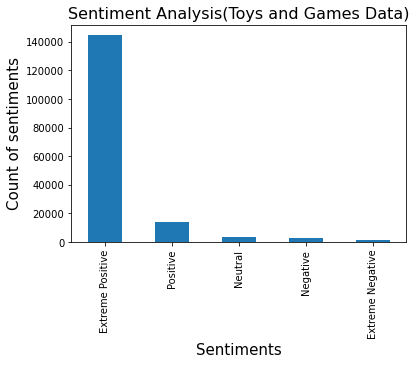

In [50]:
#plot and visualize the counts

toys_reviews5['Sentiments'].value_counts().plot(kind='bar')
plt.title('Sentiment Analysis(Toys and Games Data)',fontsize=16)
plt.xlabel('Sentiments',fontsize=15)
plt.ylabel('Count of sentiments',fontsize=15)
plt.show()

In [17]:
def wordcloud(df):
    words = " ".join(sent for sent in df['reviews'])
    
    
    wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(words)

    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    #plt.title(name,fontsize=25)
    plt.show()

### Specific product

In [4]:
toys_reviews6 = pd.read_csv('tag_nlp_final.csv')
toys_reviews6.head(2)

Unnamed: 0      reviewerID        asin  overall  reviewTime  helpful_score  \
0           0  A1VXOAVRGKGEAK  0439893577        5  2014-01-29            0.0   
1           1   A8R62G708TSCM  0439893577        4  2014-03-28            1.0   

                                             reviews  Sentiment_score  \
0  like item price granddaughter want mark want l...           0.4767   
1  love magnet easel great move different areas w...           0.9545   

         Sentiments  
0          Positive  
1  Extreme Positive

In [7]:
baby_Extreme_positive1.asin.value_counts()

B0089RPUHO    240
B0039S7NO6    206
B001W30D2O    197
B004S8F7QM    188
B002NPBT50    172
             ... 
B00F6AK2RK      1
B005VQ78US      1
9269806723      1
B002RLE2TK      1
B004USJXZG      1
Name: asin, Length: 11915, dtype: int64

In [14]:
baby_Extreme_positive1 = toys_reviews6[toys_reviews6['Sentiments'] == 'Extreme Positive']

sp1=baby_Extreme_positive1[baby_Extreme_positive1['asin']=='B0089RPUHO']
sp2=baby_Extreme_positive1[baby_Extreme_positive1['asin']=='B0039S7NO6']
sp3=baby_Extreme_positive1[baby_Extreme_positive1['asin']=='B001W30D2O']
sp4=baby_Extreme_positive1[baby_Extreme_positive1['asin']=='B004S8F7QM']
sp5=baby_Extreme_positive1[baby_Extreme_positive1['asin']=='B002NPBT50']

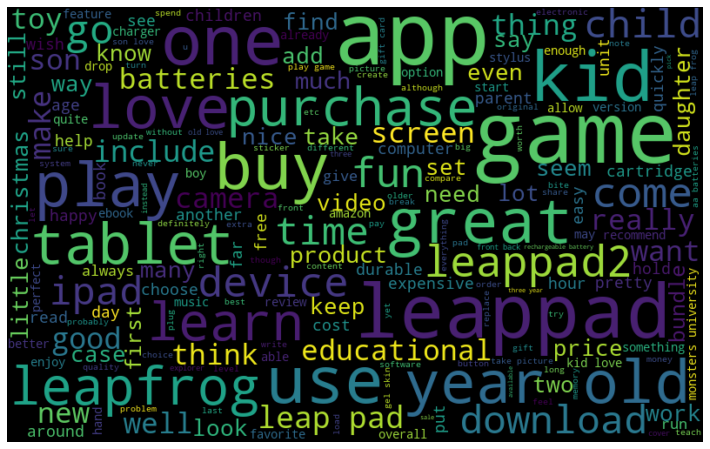

In [18]:
wordcloud(sp1)

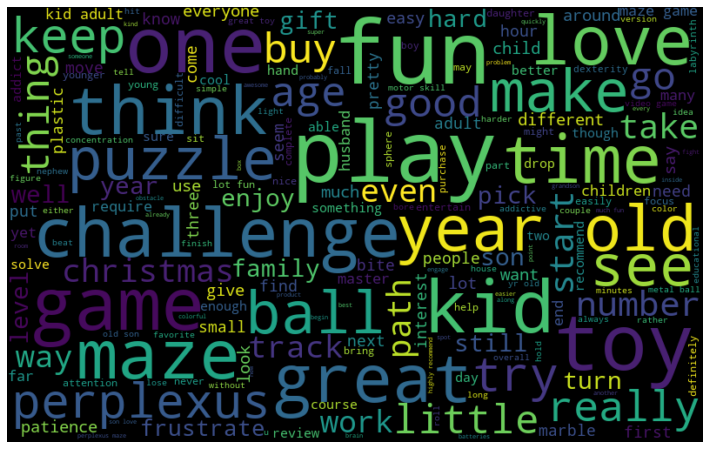

In [22]:
wordcloud(sp5)

In [57]:
baby_Extreme_neg = toys_reviews6[toys_reviews6['Sentiments'] == 'Extreme Negative']

In [58]:
baby_Extreme_neg.asin.value_counts()

B00BG8F0IW    7
B001KOTPHY    6
B003774W6Q    6
B001W9AM1K    6
B0060Y240O    6
             ..
B002KCNV70    1
B002L6I9ZY    1
B002M8V06Q    1
B002MCZ5TU    1
B00IGNWZCY    1
Name: asin, Length: 1148, dtype: int64

In [66]:
sn1=baby_Extreme_neg[baby_Extreme_neg['asin']=='B0060Y240O']
sn2=baby_Extreme_neg[baby_Extreme_neg['asin']=='B001W9AM1K']
sn3=baby_Extreme_neg[baby_Extreme_neg['asin']=='B00CI6J8L6']
sn4=baby_Extreme_neg[baby_Extreme_neg['asin']=='B00DMC6KAC']
sn5=baby_Extreme_neg[baby_Extreme_neg['asin']=='B002BY2BVE']

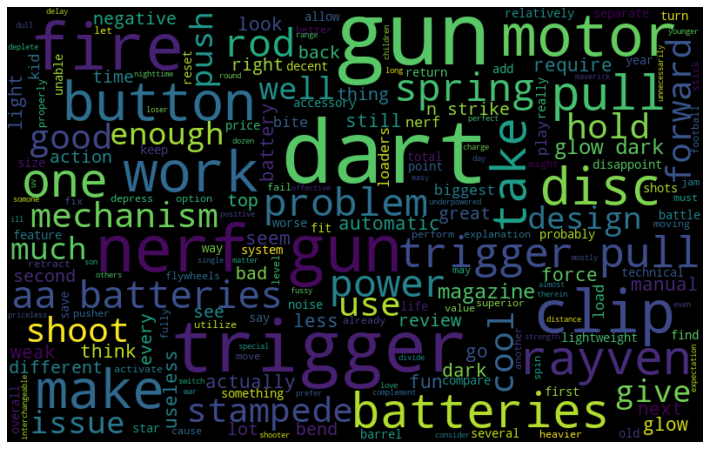

In [67]:
wordcloud(sn1)

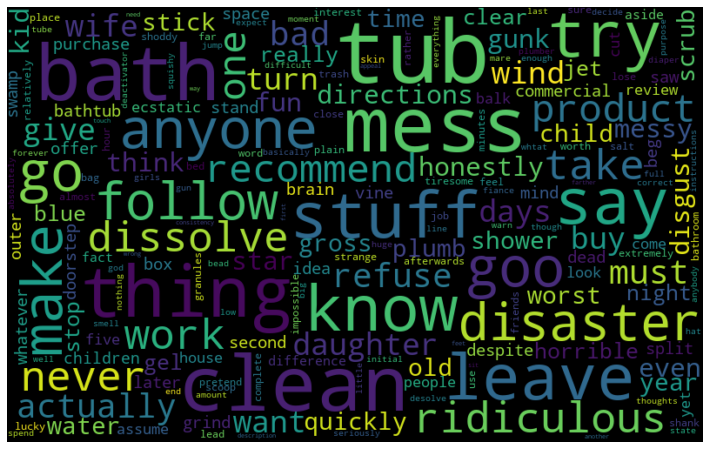

In [61]:
wordcloud(sn2)

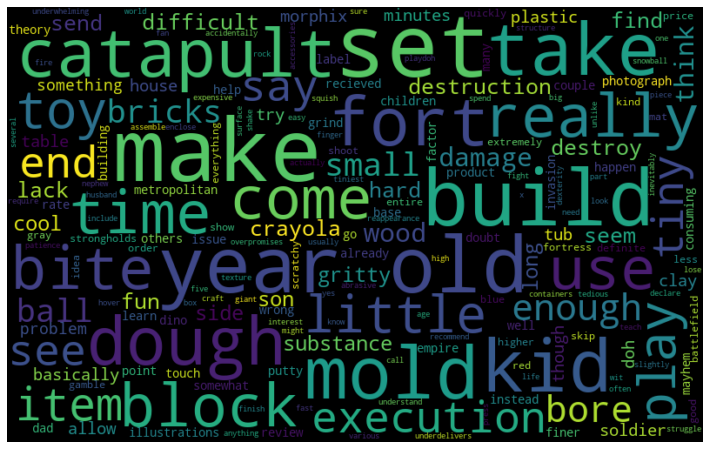

In [48]:
wordcloud(sn3)

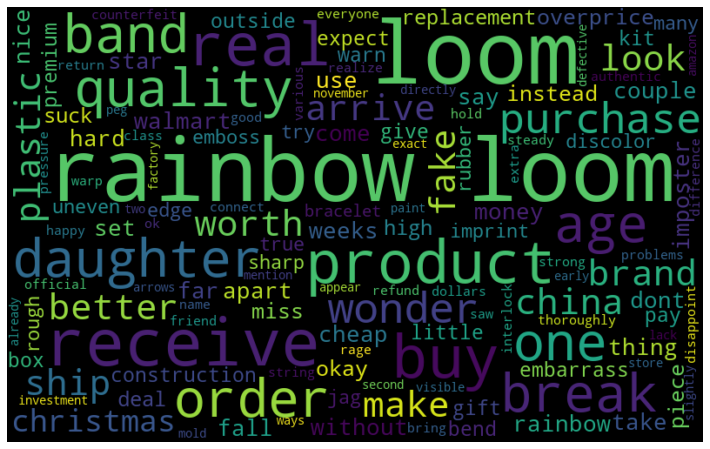

In [49]:
wordcloud(sn4)

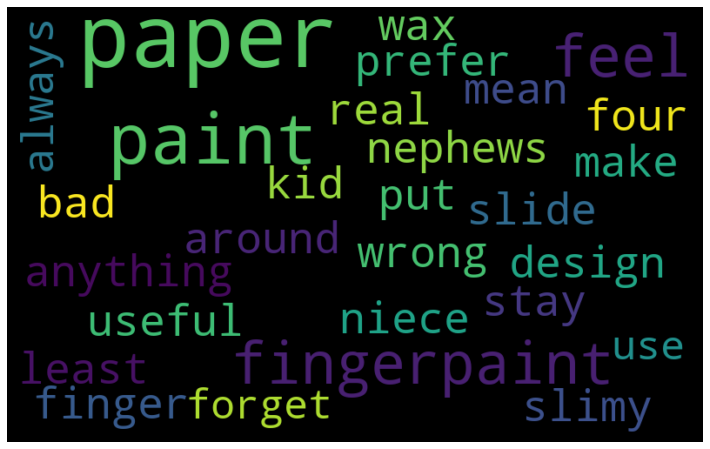

In [52]:
wordcloud(sn5)

##### Extreme positive data

In [52]:
pd.set_option('display.max_colwidth',None)
baby_Extreme_positive[['asin','reviews','Sentiment_score']].head(2)

asin  \
1  0439893577   
2  0439893577   

                                                                                                                                                                                                                                              reviews  \
1                                                                                                                             love magnet easel great move different areas wish sort non skid pad bottom though work pretty good move different areas   
2  side magnetic real plus entertain one child four-year old find letter word two-year old find picture word spell buy letter magnetic picture go board grandkids like lot mean like lot well even introduce markers use strictly magnetic board love   

   Sentiment_score  
1           0.9545  
2           0.9118

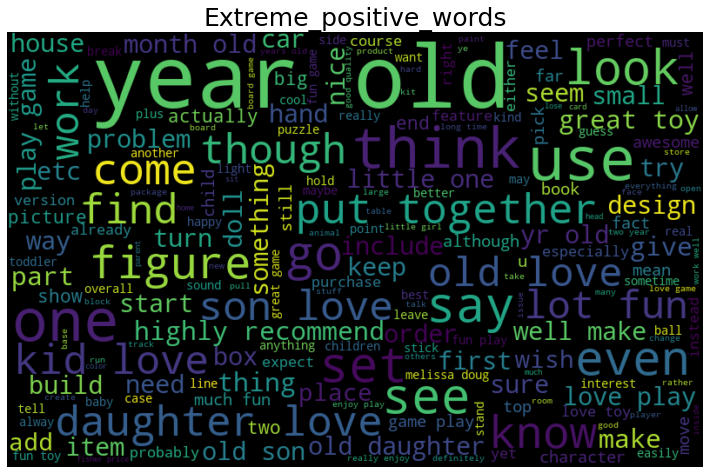

In [53]:
wordcloud(baby_Extreme_positive,'Extreme_positive_words')

In [54]:
#baby_review_epos.to_csv("baby_epos.csv")

##### Positive data

In [55]:
baby_positive[['asin','reviews','Sentiment_score']].head(2)

asin  \
0   0439893577   
12  0439893577   

                                                                                                                                                                                                                                                                                                     reviews  \
0                                                                                                                                                                                                                                         like item price granddaughter want mark want letter magnetic board   
12  board put away month old grand daughter use refrigerator alphabet intend bring back board get little older wooden letter paint rather cover color paper become loose rather easily letter last months throw fortunately know alphabet name use mean teach put together word age spell name molly durable   

    Sentiment_score  
0            0.4767  
12           0.4767

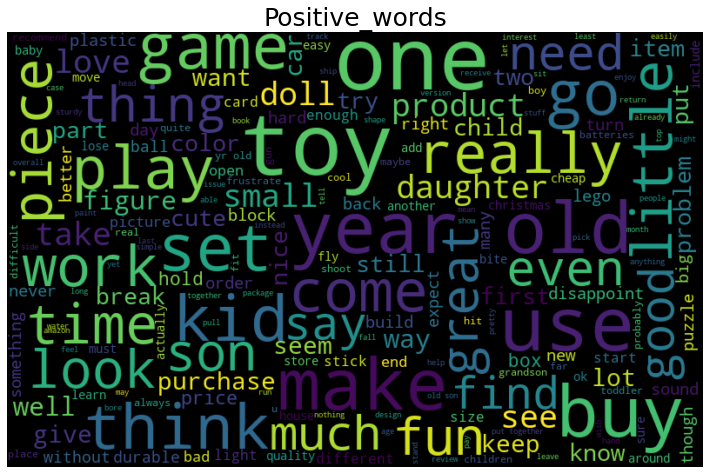

In [56]:
wordcloud(baby_positive,'Positive_words')

In [57]:
#baby_review_pos.to_csv("baby_pos.csv")

##### Negative data

In [58]:
baby_negative[['asin','reviews','Sentiment_score']].head(2)

asin  \
32  0545496470   
98  073533417X   

                                                                                                                                                                      reviews  \
32                                                                              waaaaay overprice get daughter want think disappoint content thin despite bulky cover much go   
98  jumbo puzzle way go young ones one difficult little child figure big enough fear choke piece puzzle make sturdy handle abuse year old niece enjoy sure perfect little kid   

    Sentiment_score  
32          -0.3400  
98          -0.6369

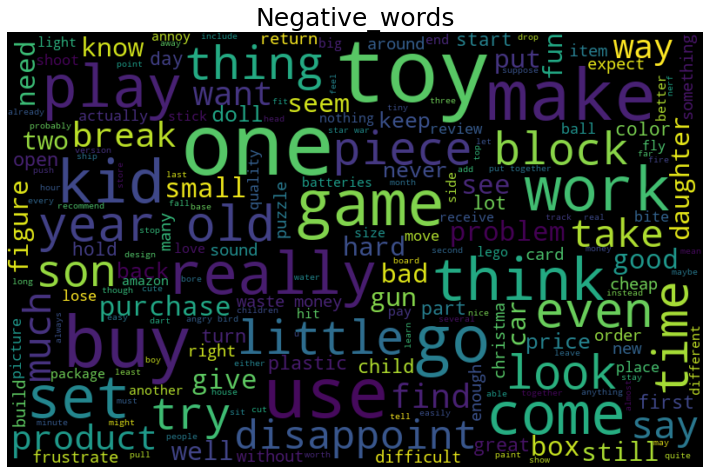

In [59]:
wordcloud(baby_negative,'Negative_words')

In [60]:
#baby_review_neg.to_csv("baby_neg.csv")

###### Extreme negative data

In [61]:
baby_Extreme_negative[['asin','reviews','Sentiment_score']].head(2)

asin  \
27   048645195X   
157  0786950072   

                                                                                                                                 reviews  \
27                                                   art nice color book find page bore repetitive thin page mean use markers bummer bad   
157  crappy cardboard ghost original hard believe shame hasbro disgust crappy cardboard ghost original hard believe shame hasbro disgust   

     Sentiment_score  
27           -0.7430  
157          -0.9719

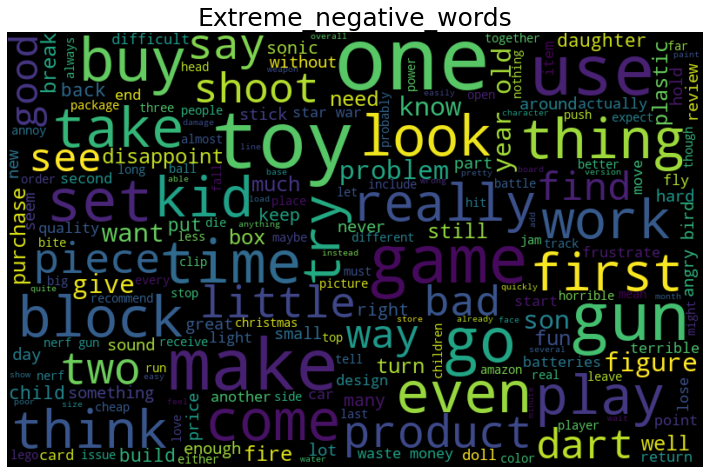

In [62]:
wordcloud(baby_Extreme_negative,'Extreme_negative_words')

In [63]:
#baby_review_eneg.to_csv("baby_eneg.csv")

##### Neutral data

In [64]:
baby_neutral[['asin','reviews','Sentiment_score']].head(2)

asin  \
44   0670010936   
213  0786958731   

                                                                                                                                                        reviews  \
44                come today son instantly recognize book two bite worry little bear attach rip middle night choke kind fear watch otherwise seem great promise   
213  castle raven loft wrath ashardalon legend drizzt stream line encounter add long last power either first two must difficulty hard castle ravenloft good mix   

     Sentiment_score  
44            0.0516  
213           0.0258

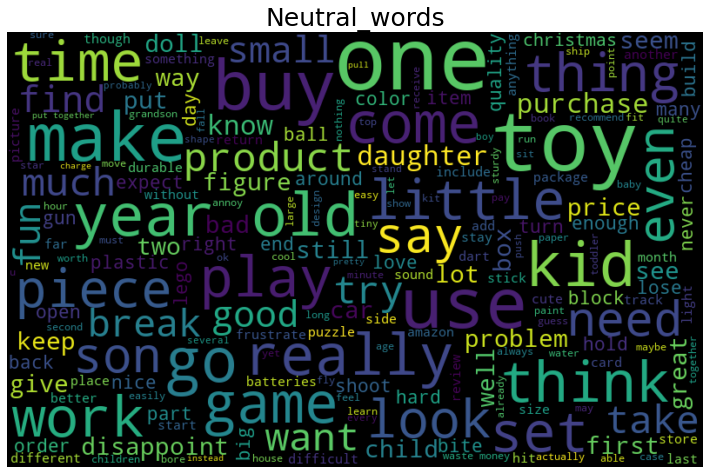

In [65]:
wordcloud(baby_neutral,'Neutral_words')

In [66]:
#baby_review_neu.to_csv("baby_neu.csv")

##### Problem 1.4

In [67]:
baby_Extreme_negative.head(50)

reviewerID        asin  overall  reviewTime  helpful_score  \
27    A252DMIM13A3K7  048645195X        4  2013-10-29       0.000000   
157   A337DRCGSM0HSC  0786950072        1  2012-06-05       1.000000   
180   A3OQNAJ33UDWH1  0786955570        5  2013-04-21       0.000000   
1078   A58CKSDLI2QRX  1589781244        5  2013-11-30       1.000000   
1133  A3747YPXOBXRAT  1589942108        4  2012-06-08       1.000000   
1150  A1981KGW9BJUA4  1589942841        5  2012-04-23       0.000000   
1181  A3747YPXOBXRAT  1589944348        5  2013-01-05       0.000000   
1393   AB3GJ41FTGR3S  1616611359        1  2013-02-27       0.000000   
1549  A3M7Q456YHHMH2  1616614471        1  2013-05-03       1.000000   
1652  A3GLIBRI4MDQ1I  1616616776        5  2013-10-04       0.926829   
1673   AMOYMAQWX70P2  1616617667        5  2014-01-18       0.000000   
1859  A1F7IP6EJ5DOR1  1932855785        3  2013-03-13       0.000000   
2182  A3G50AHS8H7FYV  1938146905        5  2012-08-19       0.500000   
2353  A1JV3E2M4AOOOV  8499000606        1  2011-12-25       0.000000   
2391   A1M8MS6PGJ2LT  8499000606        3  2011-12-25       0.000000   
2417   A5ZB1EOTBH1ID  8499009522        1  2014-01-07       0.000000   
2441   A3IJ4Z18FTIIP  9269807096        4  2014-01-05       0.000000   
2557  A323SBUESX9H53  B00000DMC6        3  2010-10-05       0.000000   
2865  A13XUPXF7QZ4ZB  B00000DMFD        1  2005-07-24       0.900000   
2877  A3ILO637M9PLDP  B00000DMFM        1  2006-03-27       0.000000   
2908  A10AKE9TAADHVV  B00000DMFN        3  2010-06-17       1.000000   
2921   AAJRN2LSNC12A  B00000DMFN        1  2014-02-03       0.000000   
3083   AUVUTAC87UL1X  B00000IRYM        1  2011-03-19       0.000000   
3113  A1OZEX6BNJEDBM  B00000IRZ6        1  2005-06-12       0.000000   
3194  A2WK7A8K9VTWRS  B00000ISC5        3  2009-11-20       0.000000   
3230  A28SSGM360CRIE  B00000ISC5        2  2012-06-16       0.000000   
3274  A1M5X915E9FYB7  B00000ISEH        5  2010-11-08       0.000000   
3334  A1T6497R1EI9A6  B00000ISUK        1  2007-01-23       0.888889   
3663  A1F7IP6EJ5DOR1  B00000IV4K        4  2013-04-22       0.000000   
3930  A2AOZQ3WTNVVOK  B00000IWCX        5  2004-10-07       0.000000   
4032   AJLJO486GAHZU  B00000IWD7        1  2012-12-29       0.000000   
4059  A2E5YB82QUVP83  B00000IWD7        1  2013-04-07       0.000000   
4675  A2V55F355DDVCG  B00000IZOR        2  2013-12-31       0.000000   
4799  A1Y40TFYSTZPUN  B00000IZOU        5  2014-05-01       0.823529   
5071  A1QFM9CFEUXZK5  B00000J0HG        3  2010-02-03       1.000000   
5244  A1U3VD2EB4ND0M  B00000J421        3  2013-10-10       0.000000   
5245  A273PTX1KD95FU  B00000J421        5  2012-05-20       0.000000   
5377  A2QXG8LOXOT32O  B00000J50F        2  2012-12-12       0.000000   
5725  A18MVTKTTE8OS8  B00000JICU        1  2010-04-06       0.000000   
6412   ADGWIEWO20SMO  B00001ZX17        2  2011-07-18       0.000000   
6444  A10DB0H2NZF11E  B0000205X3        1  2012-08-24       0.000000   
6770  A1XB244Z0HF6BQ  B00004NKKN        1  2013-08-15       1.000000   
6943  A3QFRVCZKG7M9J  B00004SCWA        1  2005-04-16       1.000000   
7183  A2IYL6JNRTBKJ3  B00004T71M        3  2013-06-12       0.000000   
7189  A1ZWSK60V0RVZF  B00004T76D        1  2013-01-20       0.500000   
7239  A2LSGQ6HMEBG3K  B00004TFRN        2  2011-04-28       0.000000   
7658   A2USMIT2CSA08  B00004UBH2        2  2014-07-06       0.000000   
7719  A1NQKWS81ENDTV  B00004UD6H        3  2011-03-28       0.500000   
7782  A1MVYVGYPRLQ7N  B00004UE4S        2  2014-02-04       0.833333   
8061  A2AF0NOCM71J0B  B00004WJU4        3  2013-04-11       0.000000   

                                                                                                                                                                                                                                                                                                                                                 

In [68]:
import spacy
nlp = spacy.load("en_core_web_sm")
#nouns = []
def productnames(doc1):
    noun=[]
    d=nlp(str(doc1))
    for token in d:
        if token.pos_ == 'NOUN':
            noun.append(token)
    print(noun)

In [69]:
doc1= baby_Extreme_negative['reviews'][157]
productnames(doc1)

[cardboard, ghost, disgust, cardboard, ghost, disgust]


In [70]:
doc1= baby_Extreme_negative['reviews'][1078]
productnames(doc1)

[gloom, need, game, skin, game, change, statement, need, game, cthulhu, gloom, gloom, players, family, goal, family, condition, pathos, card, players, card, players, card, turn, players, death, action, card, card, effect, family, member, turn, players, card, family, member, player, family, members, card, effect, effect, person, card, effect, person, card, logo, effect, players, family, game, player, families, pathos, score, player, pathos, score, winner, game, play, game, force, stories, spinsters, gossip, friends, family, fun, death, character, game, theme, gods, gloom, effect, game, dislike, game, thing, balance, sully, game, insult, mechanics, game, design, gloom, gods, game, rat, time, people, steam, keep, game, cthulhu, gloom]


### Model Building

In [ ]:
#for model building use this notebook : final_project_tag_model_building 

## Problem statement 2

##### Identify the names of few products by analysing your input text data. For this task, downloading product names directly from any link is not allowed.


In [3]:
toys_reviews6 = pd.read_csv('tag_nlp_final.csv')
toys_reviews6.head(2)

Unnamed: 0      reviewerID        asin  overall  reviewTime  helpful_score  \
0           0  A1VXOAVRGKGEAK  0439893577        5  2014-01-29            0.0   
1           1   A8R62G708TSCM  0439893577        4  2014-03-28            1.0   

                                             reviews  Sentiment_score  \
0  like item price granddaughter want mark want l...           0.4767   
1  love magnet easel great move different areas w...           0.9545   

         Sentiments  
0          Positive  
1  Extreme Positive

In [4]:
import spacy
nlp = spacy.load("en_core_web_sm")
#nouns = []
def productnames(doc1):
    noun=[]
    d=nlp(str(doc1))
    for token in d:
        if token.pos_ == 'NOUN':
            noun.append(token)
    print(noun)

In [45]:
doc1= toys_reviews6[toys_reviews6['asin']=='048645195X']
doc1
#productnames(doc1)

Unnamed: 0      reviewerID        asin  overall  reviewTime  \
17          17   AQN75W8HMUFSP  048645195X        5  2012-12-05   
18          18  A32WT1ZEE4QGZB  048645195X        4  2014-01-02   
19          19  A1X3ESYZ79H59E  048645195X        5  2009-05-05   
20          20   AKMEY1BSHSDG7  048645195X        5  2008-05-30   
21          21  A2GYEPZKMD3J2Z  048645195X        5  2013-12-27   
22          22  A2IB3CUVPRE28M  048645195X        5  2013-11-20   
23          23  A1MPWLA14I9OWW  048645195X        5  2013-03-26   
24          24   ASVLLLS52G0A8  048645195X        5  2013-12-31   
25          25   AU21B5JSG23FQ  048645195X        3  2013-08-03   
26          26   AKU1TXYBJKSV6  048645195X        3  2010-01-28   
27          27  A252DMIM13A3K7  048645195X        4  2013-10-29   

    helpful_score                                            reviews  \
17       0.000000  absolute favorite design book pattern intricat...   
18       1.000000  work mandala type color book teach us lot ligh...   
19       0.875000  book contain full page design beautiful intric...   
20       0.846154  prepare sweep away beauty image color choices ...   
21       0.000000  oh teenager really order honest go borrow call...   
22       1.000000  nice time destraction buy year old niece altho...   
23       0.000000  color right along grandchildren without feel i...   
24       0.000000  color book provide hours creativity entertainm...   
25       1.000000  picture book detail frustrate expect many dove...   
26       0.833333  recieved copy decorative tile design thrill ac...   
27       0.000000  art nice color book find page bore repetitive ...   

    Sentiment_score        Sentiments  
17           0.8176  Extreme Positive  
18           0.9944  Extreme Positive  
19           0.9260  Extreme Positive  
20           0.9750  Extreme Positive  
21           0.9884  Extreme Positive  
22           0.9325  Extreme Positive  
23           0.8325  Extreme Positive  
24           0.9153  Extreme Positive  
25           0.4404          Positive  
26           0.9866  Extreme Positive  
27          -0.7430  Extreme Negative

In [32]:
doc1= toys_reviews6['reviews'][18425]
productnames(doc1)


[scene, dolls, posers, remind, way, cooler, masquerade, madness, doll, copy, funk, mattel, fact, reign, terror, mattel, scene, dolls]


In [36]:
doc1= toys_reviews6['reviews'][99605]
productnames(doc1)


[bird, year, use, part, birthday, cake, weekend, bird, birthday, party, launcher, fun, play, play, year, belly, laugh, home, fun]


In [42]:
doc1= toys_reviews6['reviews'][68182]
productnames(doc1)

[well, air, hog, work, impress, truth, amount, fun, air, hog, limit, imagination, reason, toy, time, game, play, use, ideas, modifications, age]


In [44]:
doc1= toys_reviews6['reviews'][44011]
productnames(doc1)

[disappoint, pool, morning, time, day, product, mark, grass, wonder, product, pool, hour, quality, air]


In [48]:
doc1= toys_reviews6['reviews'][25]
productnames(doc1)

[picture, book, detail, frustrate, dover, book, book]


## Problem Statement 3

##### Predict future data trends: How the sentiments of reviewers change with time. Suppose input data is provided for the period 1996-2014. Your task is to predict the trends after 2014.


In [77]:
#!pip install pmdarima

In [2]:
# decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# dickey fuller test for stationarity check
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.tsa.statespace.tools import diff

# pip install pmdarima

# arima
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

#ACF, PACF, MSE
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm



In [3]:
baby_date = pd.read_csv('tag_nlp_final.csv', index_col="reviewTime",parse_dates=True)#, index_col="reviewTime",parse_dates=True
baby_date.head(2)

Unnamed: 0      reviewerID        asin  overall  helpful_score  \
reviewTime                                                                   
2014-01-29           0  A1VXOAVRGKGEAK  0439893577        5            0.0   
2014-03-28           1   A8R62G708TSCM  0439893577        4            1.0   

                                                      reviews  \
reviewTime                                                      
2014-01-29  like item price granddaughter want mark want l...   
2014-03-28  love magnet easel great move different areas w...   

            Sentiment_score        Sentiments  
reviewTime                                     
2014-01-29           0.4767          Positive  
2014-03-28           0.9545  Extreme Positive

In [4]:
baby_date=baby_date.drop(['Unnamed: 0','reviewerID','reviews'], axis = 1)


In [5]:
baby_date.head()

asin  overall  helpful_score  Sentiment_score  \
reviewTime                                                        
2014-01-29  0439893577        5            0.0           0.4767   
2014-03-28  0439893577        4            1.0           0.9545   
2013-01-28  0439893577        5            1.0           0.9118   
2014-02-08  0439893577        5            0.0           0.9460   
2014-05-05  0439893577        4            1.0           0.9559   

                  Sentiments  
reviewTime                    
2014-01-29          Positive  
2014-03-28  Extreme Positive  
2013-01-28  Extreme Positive  
2014-02-08  Extreme Positive  
2014-05-05  Extreme Positive

In [6]:
baby_Extreme_positive1 = baby_date[baby_date['Sentiments'] == 'Extreme Positive']
baby_positive1 = baby_date[baby_date['Sentiments'] == 'Positive']
baby_neutral1 = baby_date[baby_date['Sentiments'] == 'Neutral']
baby_negative1 = baby_date[baby_date['Sentiments'] == 'Negative']
baby_Extreme_negative1 = baby_date[baby_date['Sentiments'] == 'Extreme Negative']


In [7]:
baby_Extreme_positivef=baby_Extreme_positive1[['Sentiment_score','overall','helpful_score']].resample('m').mean().interpolate(method='linear')
baby_positivef=baby_positive1[['Sentiment_score','overall','helpful_score']].resample('m').mean().interpolate(method='linear')
baby_neutralf=baby_neutral1[['Sentiment_score','overall','helpful_score']].resample('m').mean().interpolate(method='linear')
baby_negativef=baby_negative1[['Sentiment_score','overall','helpful_score']].resample('m').mean().interpolate(method='linear')
baby_Extreme_negativef=baby_Extreme_negative1[['Sentiment_score','overall','helpful_score']].resample('m').mean().interpolate(method='linear')

In [8]:
baby_Extreme_positivef

Sentiment_score   overall  helpful_score
reviewTime                                          
2000-07-31         0.928700  5.000000       0.000000
2000-08-31         0.973500  5.000000       1.000000
2000-09-30         0.917800  4.666667       0.333333
2000-10-31         0.954045  4.818182       0.181818
2000-11-30         0.944800  4.714286       0.383459
...                     ...       ...            ...
2014-03-31         0.920575  4.558347       0.261061
2014-04-30         0.921308  4.559388       0.281326
2014-05-31         0.917164  4.563533       0.254612
2014-06-30         0.918595  4.555317       0.245558
2014-07-31         0.914398  4.524177       0.204095

[169 rows x 3 columns]

In [10]:
baby_Extreme_positivet=baby_Extreme_positivef[['Sentiment_score']]
baby_positivet=baby_positivef[['Sentiment_score']]
baby_neutralt=baby_neutralf[['Sentiment_score']]
baby_negativet=baby_negativef[['Sentiment_score']]
baby_Extreme_negativet=baby_Extreme_negativef[['Sentiment_score']]

In [11]:
print(baby_Extreme_positivet.isnull().sum())
print(baby_positivet.isnull().sum())
print(baby_neutralt.isnull().sum())
print(baby_negativet.isnull().sum())
print(baby_Extreme_negativet.isnull().sum())

Sentiment_score    0
dtype: int64
Sentiment_score    0
dtype: int64
Sentiment_score    0
dtype: int64
Sentiment_score    0
dtype: int64
Sentiment_score    0
dtype: int64


In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
def decom(data):

    ts_comp=seasonal_decompose(data,period=12)
    d_trend=ts_comp.trend
    d_seasonal=ts_comp.seasonal
    #plot the components
    _,ax=plt.subplots(2,1,figsize=(18,10))

    plt.subplot(211)
    plt.plot(d_trend,label='Trend')
    plt.legend()

    plt.subplot(212)
    plt.plot(d_seasonal,label='d_seasonal')
    plt.legend()

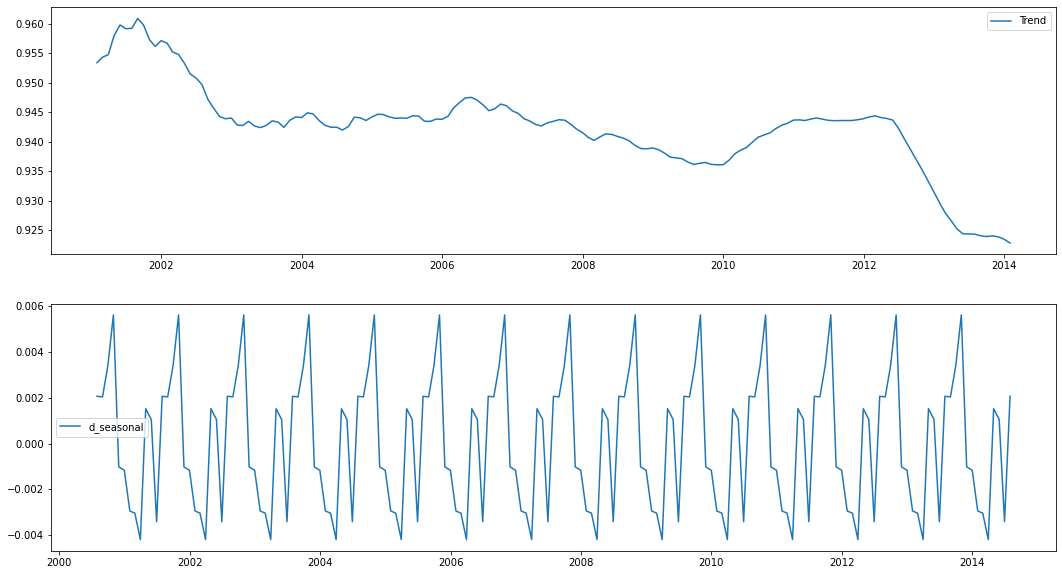

In [15]:
decom(baby_Extreme_positivet)

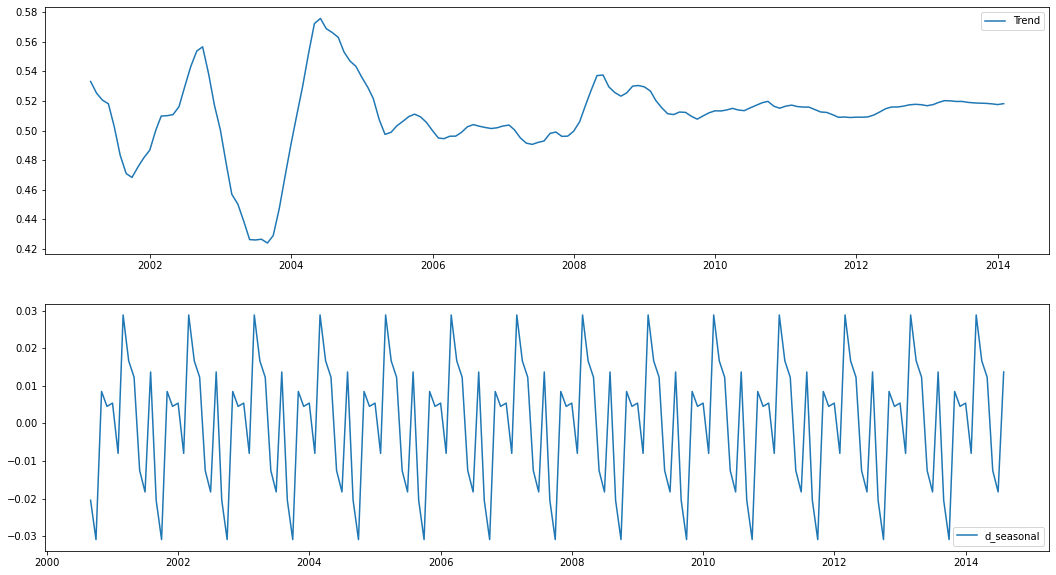

In [96]:
decom(baby_positivet)

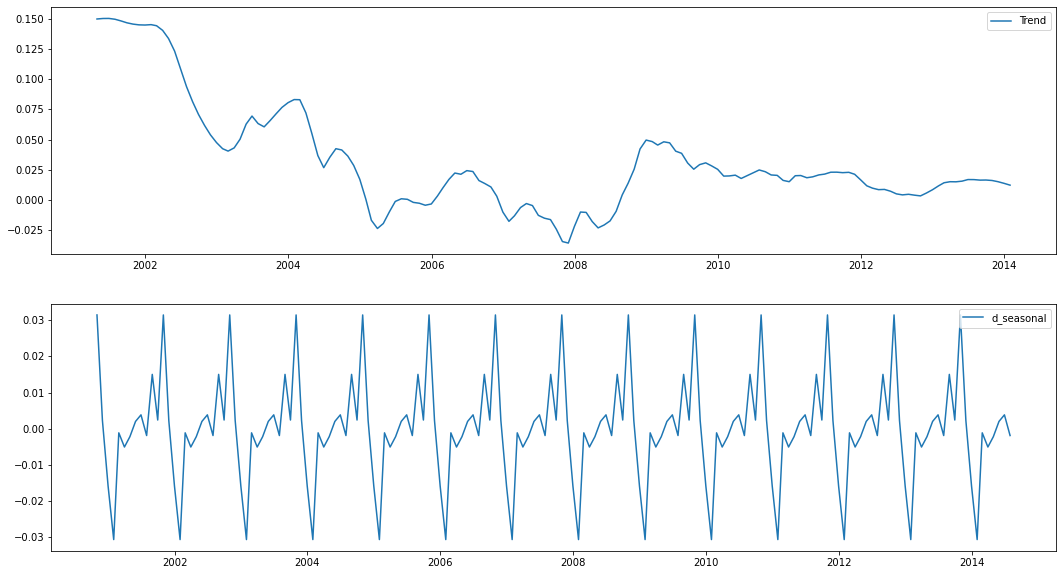

In [97]:
decom(baby_neutralt)

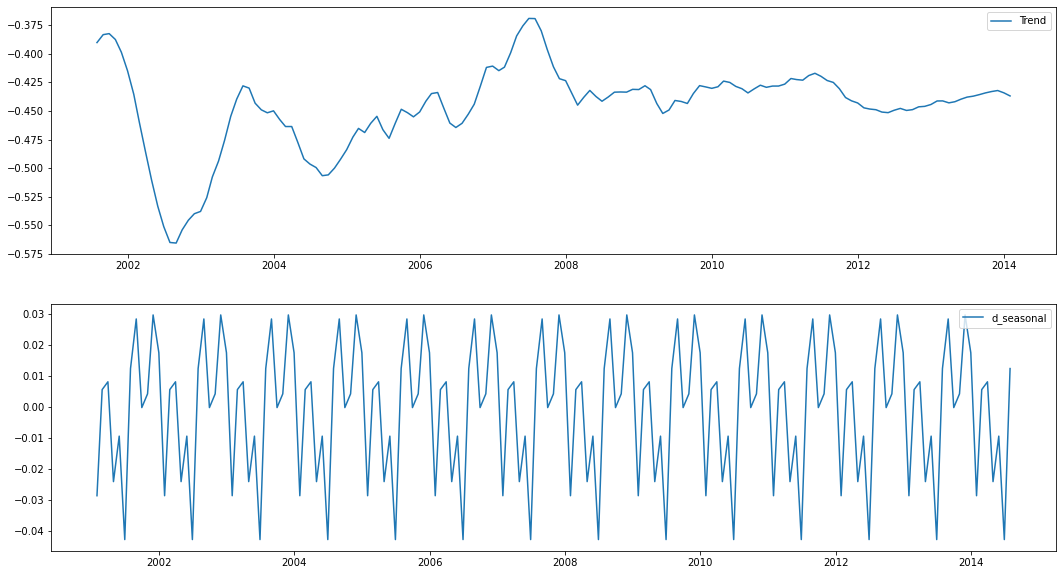

In [98]:
decom(baby_negativet)

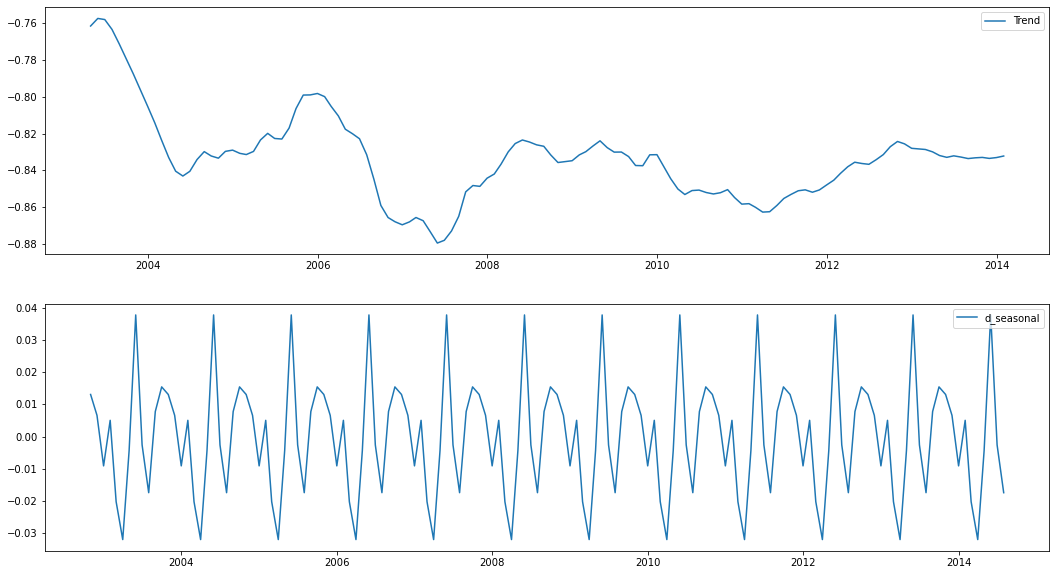

In [99]:
decom(baby_Extreme_negativet)

## check for stationarity

In [13]:
def checkStationarity(data):
    pvalue=adfuller(data)[1]
    if (pvalue < 0.05):
        ret = "pvalue = {}. Model is stationary. Proceed to model building".format(pvalue)
    else:
        ret = "pvalue = {}. Model is not stationary.Difference".format(pvalue)
    return(ret)  

In [101]:
checkStationarity(baby_Extreme_positivet)

'pvalue = 0.019720402077102232. Model is stationary. Proceed to model building'

In [102]:
checkStationarity(baby_positivet)

'pvalue = 1.100428013334694e-08. Model is stationary. Proceed to model building'

In [103]:
checkStationarity(baby_neutralt)

'pvalue = 1.8931278554013577e-08. Model is stationary. Proceed to model building'

In [104]:
checkStationarity(baby_negativet)

'pvalue = 9.59377002551433e-07. Model is stationary. Proceed to model building'

In [105]:
checkStationarity(baby_Extreme_negativet)

'pvalue = 3.292065382077849e-10. Model is stationary. Proceed to model building'

# ACF and PACF

In [14]:
def acf_pacf(data):
    fig, ax = plt.subplots(1,2,figsize=(10,5))
    sm.graphics.tsa.plot_acf(data.values.squeeze(), lags=10, ax=ax[0])
    sm.graphics.tsa.plot_pacf(data.values.squeeze(), lags=10, ax=ax[1])
    plt.show()

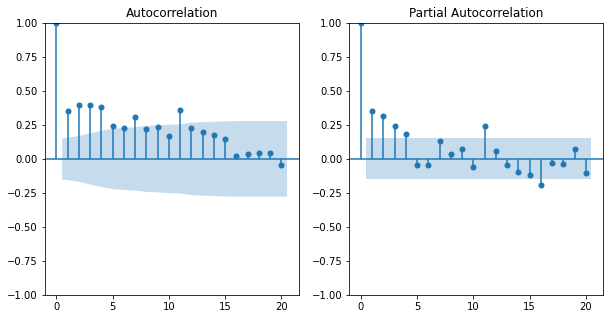

In [107]:
acf_pacf(baby_Extreme_positivet)

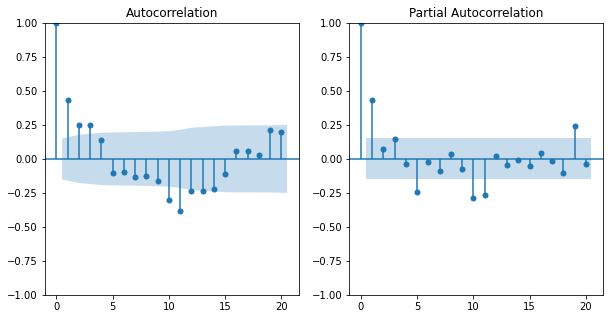

In [108]:
acf_pacf(baby_positivet)

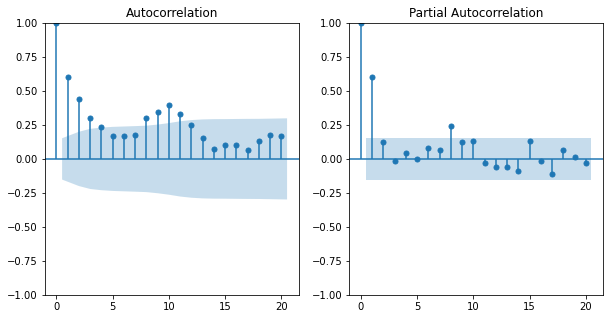

In [109]:
acf_pacf(baby_neutralt)

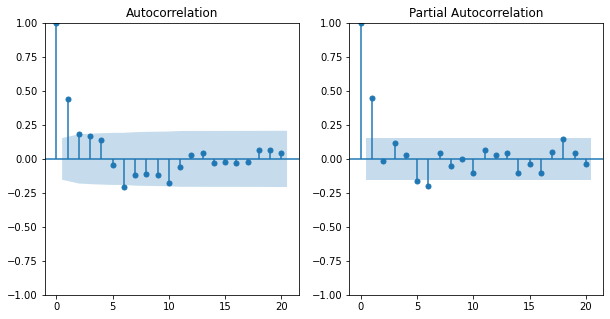

In [110]:
acf_pacf(baby_negativet)

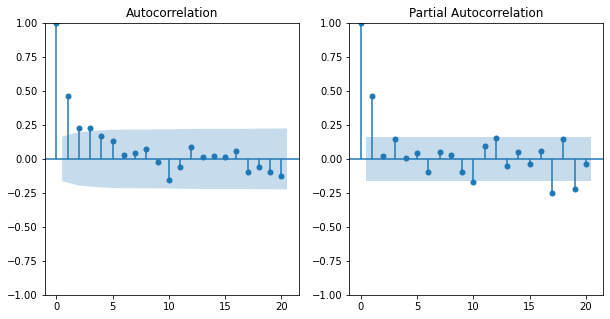

In [111]:
acf_pacf(baby_Extreme_negativet)

In [112]:
a=['baby_Extreme_positive','baby_positive','baby_neutral','baby_negative','baby_Extreme_negative']

## split

In [15]:

ss1=int(len(baby_Extreme_positivef)*0.7)
traint1=baby_Extreme_positivef.iloc[:ss1]
testt1=baby_Extreme_positivef.iloc[ss1:]

ss2=int(len(baby_positivef)*0.7)
traint2=baby_positivef.iloc[:ss2]
testt2=baby_positivef.iloc[ss2:]

ss3=int(len(baby_neutralf)*0.7)
traint3=baby_neutralf.iloc[:ss3]
testt3=baby_neutralf.iloc[ss3:]

ss4=int(len(baby_negativef)*0.7)
traint4=baby_negativef.iloc[:ss4]
testt4=baby_negativef.iloc[ss4:]

ss5=int(len(baby_Extreme_negativef)*0.7)
traint5=baby_Extreme_negativef.iloc[:ss5]
testt5=baby_Extreme_negativef.iloc[ss5:]

In [16]:
exog1=traint1[['overall','helpful_score']].values
exog2=traint2[['overall','helpful_score']].values
exog3=traint3[['overall','helpful_score']].values
exog4=traint4[['overall','helpful_score']].values
exog5=traint5[['overall','helpful_score']].values

exogt1=testt1[['overall','helpful_score']].values
exogt2=testt2[['overall','helpful_score']].values
exogt3=testt3[['overall','helpful_score']].values
exogt4=testt4[['overall','helpful_score']].values
exogt5=testt5[['overall','helpful_score']].values

ARIMAX model

In [17]:
def fun(data,data1,ex,ext,p,d,q):
    
    train = pd.DataFrame(data)
    test = pd.DataFrame(data1)
    #print(test)
    m1=ARIMA(train,order=(p,d,q),exog=ex).fit()
    global mse1
    
    
    f1=m1.forecast(len(test),exog=ext)
    #print(f1)
    actual=[]
    pred=[]
    for i in range(len(f1)):
        actual.append(test.Sentiment_score[i])
        pred.append(f1[i])
    df1=pd.DataFrame({'actual':actual,'predicted':pred})
    
    mse1=mean_squared_error(df1.actual,df1.predicted)
    
    return mse1

In [125]:
p=[0,1,2,3,4,5]
d=[0]
q=[0,1,2,3,4,5]
P=[];D=[];Q=[];RMSE=[]
for i in range(len(p)):
    for j in range(len(d)):
        for k in range(len(q)):
            
            fun(traint1.Sentiment_score,testt1.Sentiment_score,exog1,exogt1,p=p[i],d=d[j],q=q[k])
            P.append(p[i]);D.append(d[j]);Q.append(q[k]);RMSE.append(round(np.sqrt(mse1),3))

In [126]:
ex_pos=pd.DataFrame(zip(P,D,Q,RMSE),columns=['P','D','Q','RMSE']).sort_values(by='RMSE')[:1]
ex_pos

P  D  Q   RMSE
34  5  0  4  0.015

In [124]:
pos=pd.DataFrame(zip(P,D,Q,RMSE),columns=['P','D','Q','RMSE']).sort_values(by='RMSE')[:1]
pos

P  D  Q   RMSE
0  0  0  0  0.014

In [122]:
neu=pd.DataFrame(zip(P,D,Q,RMSE),columns=['P','D','Q','RMSE']).sort_values(by='RMSE')[:1]
neu

P  D  Q   RMSE
0  0  0  0  0.036

In [120]:
neg=pd.DataFrame(zip(P,D,Q,RMSE),columns=['P','D','Q','RMSE']).sort_values(by='RMSE')[:1]
neg

P  D  Q   RMSE
28  4  0  4  0.028

In [117]:
ex_neg=pd.DataFrame(zip(P,D,Q,RMSE),columns=['P','D','Q','RMSE']).sort_values(by='RMSE')[:1]
ex_neg

P  D  Q   RMSE
20  3  0  2  0.029

#### model

In [18]:
m1=ARIMA(traint1.Sentiment_score,order=(5,0,4),exog=exog1).fit()
m2=ARIMA(traint2.Sentiment_score,order=(0,0,0),exog=exog2).fit()
m3=ARIMA(traint3.Sentiment_score,order=(0,0,0),exog=exog3).fit()
m4=ARIMA(traint4.Sentiment_score,order=(4,0,4),exog=exog4).fit()
m5=ARIMA(traint5.Sentiment_score,order=(3,0,2),exog=exog5).fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


##### predicted values

In [19]:
f1=m1.forecast(len(testt1),exog=exogt1)
f2=m2.forecast(len(testt2),exog=exogt2)
f3=m3.forecast(len(testt3),exog=exogt3)
f4=m4.forecast(len(testt4),exog=exogt4)
f5=m5.forecast(len(testt5),exog=exogt5)

In [26]:
len(f5)

43

##### forecast values

In [22]:
pred1 = m1.predict(len(baby_Extreme_positivef),len(baby_Extreme_positivef)+10,exog=exog1[:62])
pred2 = m2.predict(len(baby_positivef),len(baby_positivef)+10,exog=exog2[:62])
pred3 = m3.predict(len(baby_neutralf)-1,len(baby_neutralf)+10,exog=exog3[:61])
pred4 = m4.predict(len(baby_negativef)-1,len(baby_negativef)+10,exog=exog4[:60])
pred5 = m5.predict(len(baby_Extreme_negativef)-1,len(baby_Extreme_negativef)+10,exog=exog5[:54])



In [27]:
pred1_1=pd.concat([pd.Series(f1[[50]]),pred1])
pred2_1=pd.concat([pd.Series(f2[[50]]),pred2])
pred3_1=pd.concat([pd.Series(f3[[49]]),pred3])
pred4_1=pd.concat([pd.Series(f4[[48]]),pred4])
pred5_1=pd.concat([pd.Series(f5[[42]]),pred5])

In [29]:
def plot(test,pred,f,name,name2):
    fig, ax = plt.subplots(figsize=(12,6))
    ax.plot(test.Sentiment_score, label='Actual')
    ax.plot(pred, label='Forecast')
    ax.plot(f, label='Predict')
    plt.ylabel(name2,fontsize=20)
    plt.xlabel('Months',fontsize=20)
    leg = ax.legend(fontsize=15)
    plt.title(name,fontsize=24)


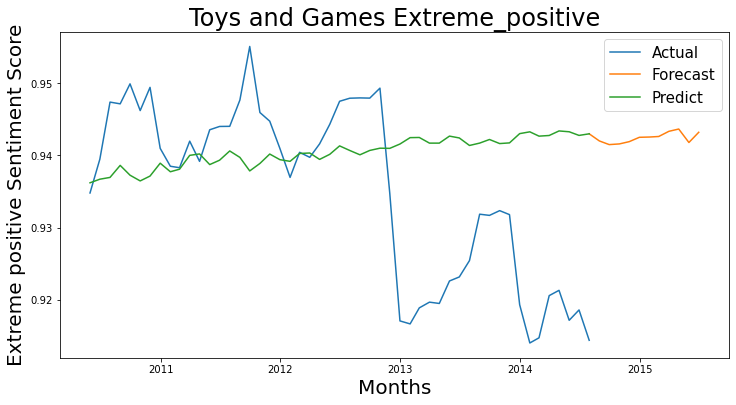

In [30]:
plot(testt1,pred1_1,f1,'Toys and Games Extreme_positive','Extreme positive Sentiment Score')

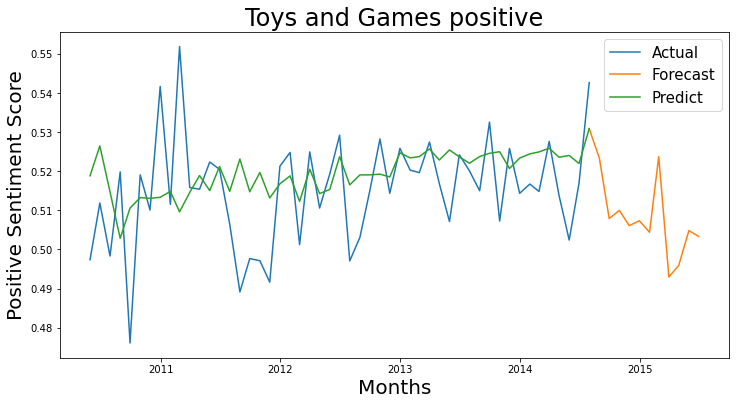

In [31]:
plot(testt2,pred2_1,f2,'Toys and Games positive','Positive Sentiment Score')

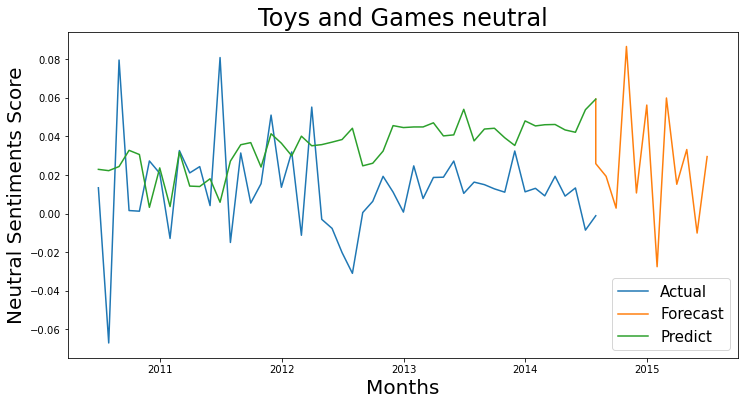

In [32]:
plot(testt3,pred3_1,f3,'Toys and Games neutral','Neutral Sentiments Score')

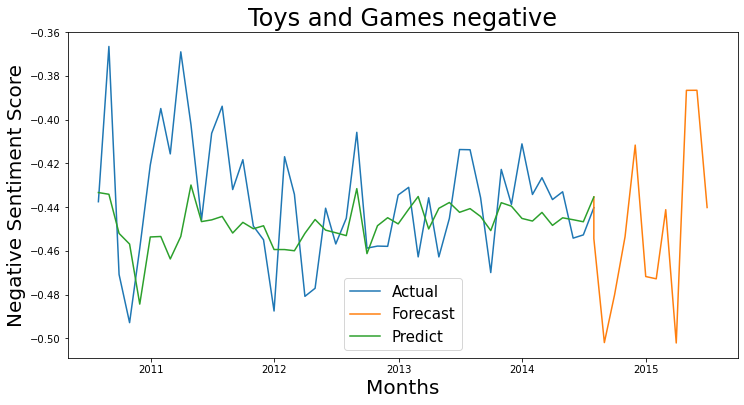

In [33]:
plot(testt4,pred4_1,f4,'Toys and Games negative','Negative Sentiment Score')

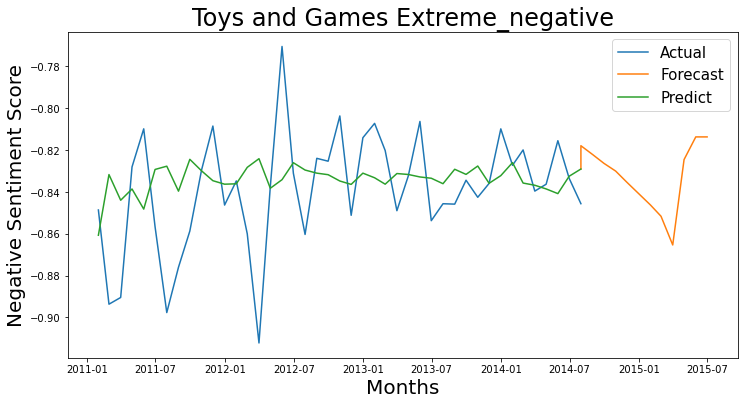

In [34]:
plot(testt5,pred5_1,f5,'Toys and Games Extreme_negative','Negative Sentiment Score')

## Product 1

In [35]:
p=baby_date[baby_date['asin']=='B0089RPUHO']
p1=p[['Sentiment_score','overall','helpful_score']].resample('m').mean().interpolate(method='linear')
ps=p1[['Sentiment_score']]


In [36]:
p1.shape

(25, 3)

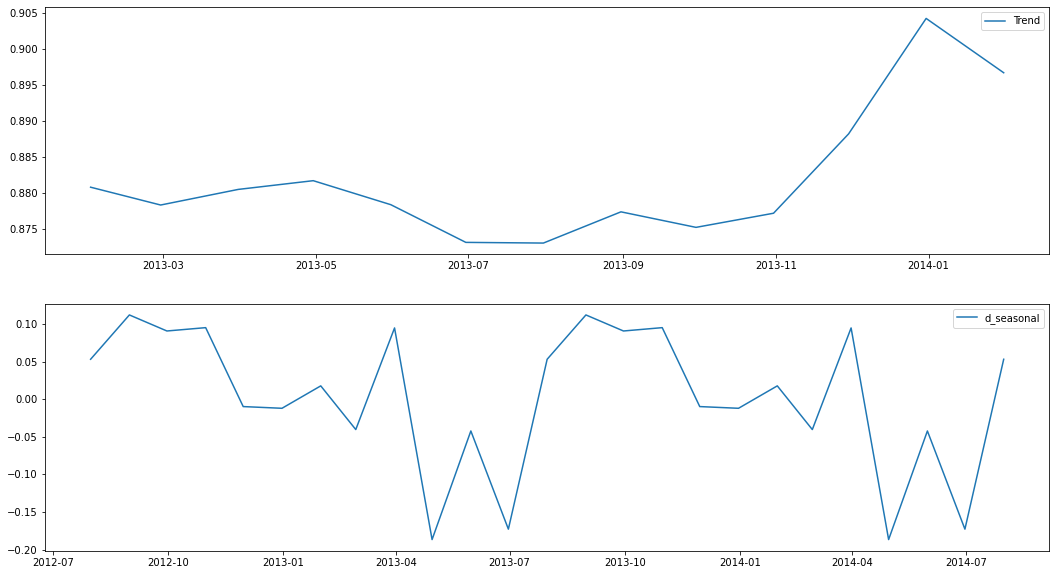

In [37]:
decom(ps)

In [38]:
checkStationarity(ps)

'pvalue = 0.023011227880992784. Model is stationary. Proceed to model building'

In [39]:
ss1=int(len(p1)*0.8)
trainp1=p1.iloc[:ss1]
testp1=p1.iloc[ss1:]

exogp1=trainp1[['overall','helpful_score']].values
exogtp1=testp1[['overall','helpful_score']].values


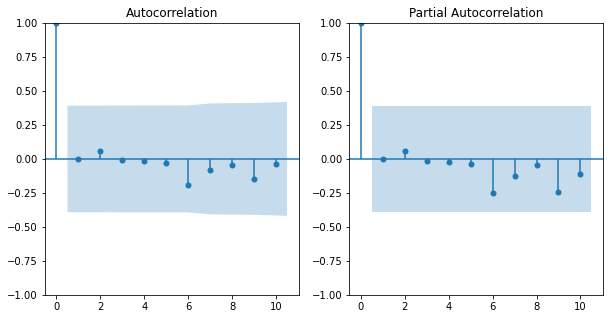

In [40]:
acf_pacf(ps)

In [41]:
p=[0,1,2]
d=[0]
q=[0,1,2]
P=[];D=[];Q=[];RMSE=[]
for i in range(len(p)):
    for j in range(len(d)):
        for k in range(len(q)):
            
            fun(trainp1.Sentiment_score,testp1.Sentiment_score,exogp1,exogtp1,p=p[i],d=d[j],q=q[k])
            P.append(p[i]);D.append(d[j]);Q.append(q[k]);RMSE.append(round(np.sqrt(mse1),3))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [42]:
all_p1=pd.DataFrame(zip(P,D,Q,RMSE),columns=['P','D','Q','RMSE']).sort_values(by='RMSE')[:1]
all_p1

P  D  Q   RMSE
3  1  0  0  0.257

In [53]:
mp1=ARIMA(trainp1.Sentiment_score,order=(1,0,0),exog=exogp1).fit()
fp1=mp1.forecast(len(testp1),exog=exogtp1)
predp1 = mp1.predict(len(p1),len(p1)+5,exog=exogp1[:11])


In [54]:
len(fp1)

5

In [55]:
predp1_1=pd.concat([pd.Series(fp1[[4]]),predp1])


In [56]:
def plotp1(test,pred,f,name,name2):
    fig, ax = plt.subplots(figsize=(12,6))
    ax.plot(test.Sentiment_score, label='Actual')
    ax.plot(pred, label='Forecast')
    ax.plot(f, label='Predict')
    plt.ylabel(name2,fontsize=20)
    plt.xlabel('Monthly',fontsize=20)
    leg = ax.legend(fontsize=15)
    plt.title(name,fontsize=24)


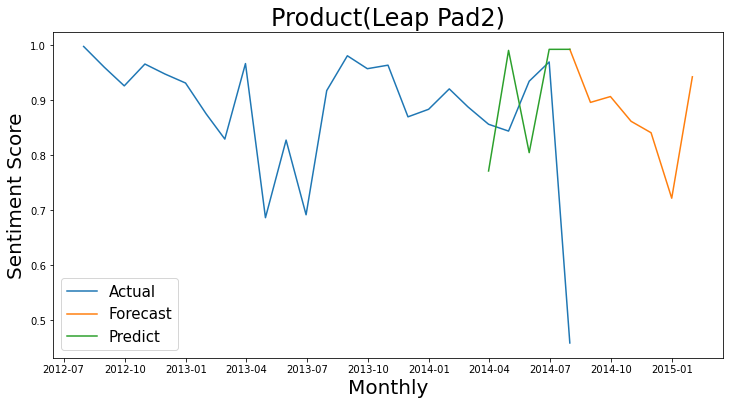

In [74]:
plotp1(p1,predp1_1,fp1,'Product(Leap Pad2)','Sentiment Score')

## Product2

In [58]:
p2=baby_date[baby_date['asin']=='B0039S7NO6']
pp2=p2[['Sentiment_score','overall','helpful_score']].resample('m').mean().interpolate(method='linear')
ps2=pp2[['Sentiment_score']]


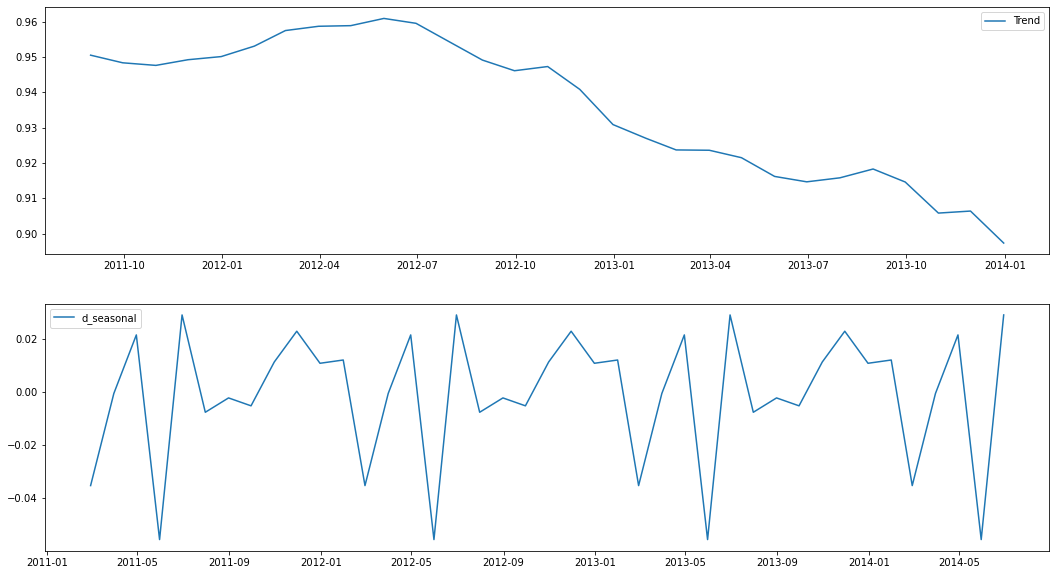

In [59]:
decom(ps2)

In [60]:
checkStationarity(ps2)

'pvalue = 0.9768785053133203. Model is not stationary.Difference'

In [61]:
ss1=int(len(pp2)*0.8)
trainp2=pp2.iloc[:ss1]
testp2=pp2.iloc[ss1:]

exogp2=trainp2[['overall','helpful_score']].values
exogtp2=testp2[['overall','helpful_score']].values


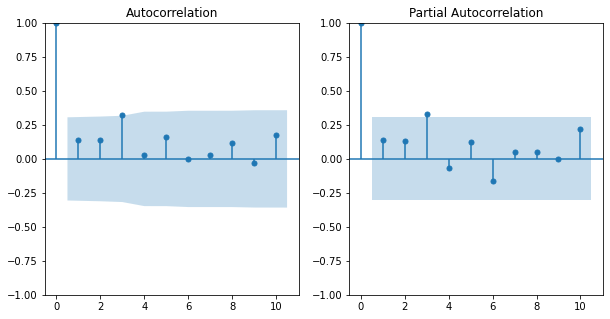

In [62]:
acf_pacf(ps2)

In [63]:
p=[0,1,2,3,4]
d=[0]
q=[0,1,2,3,4,5,6]
P=[];D=[];Q=[];RMSE=[]
for i in range(len(p)):
    for j in range(len(d)):
        for k in range(len(q)):
            
            fun(trainp2.Sentiment_score,testp2.Sentiment_score,exogp2,exogtp2,p=p[i],d=d[j],q=q[k])
            P.append(p[i]);D.append(d[j]);Q.append(q[k]);RMSE.append(round(np.sqrt(mse1),3))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

In [64]:
all_p2=pd.DataFrame(zip(P,D,Q,RMSE),columns=['P','D','Q','RMSE']).sort_values(by='RMSE')[:1]
all_p2

P  D  Q   RMSE
23  3  0  2  0.113

In [65]:
mp2=ARIMA(trainp2.Sentiment_score,order=(3,0,2),exog=exogp2).fit()
fp2=mp2.forecast(len(testp2),exog=exogtp2)
predp2 = mp2.predict(len(pp2)-1,len(pp2)+20,exog=exogp2[:30])


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [66]:
len(fp2)

9

In [67]:
predp2_1=pd.concat([pd.Series(fp2[[8]]),predp2])


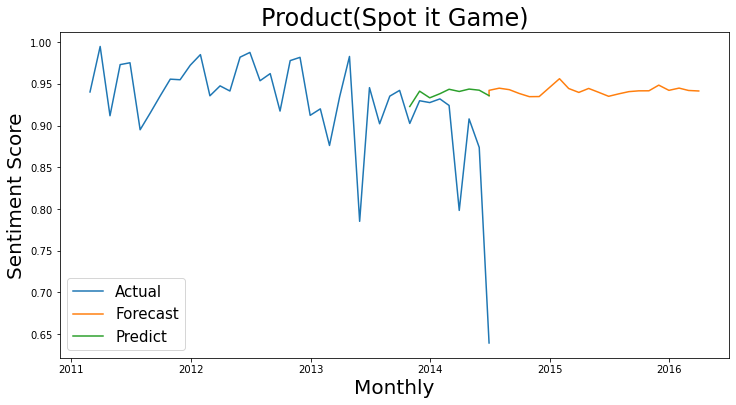

In [72]:
plotp1(pp2,predp2_1,fp2,'Product(Spot it Game)','Sentiment Score')